In [1]:
print('Jay Bholenath')

Jay Bholenath


# Business problem overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for dollar 30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

# Understanding and defining fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

#### Manipulation/alteration of genuine cards

#### Creation of counterfeit cards

#### Stealing/loss of credit cards

#### Fraudulent telemarketing

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Reading the Dataset

In [3]:
df=pd.read_csv(r"C:\Users\sonim\OneDrive\Desktop\Credit Card Fraud\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Each variable in the dataset is numerical variable

In [6]:
df.describe().round(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


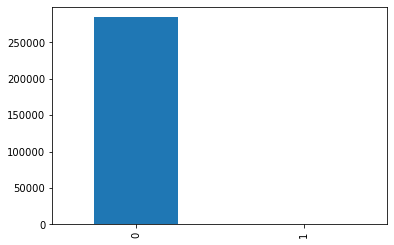

In [7]:
# Checking the class-imbalance

df.Class.value_counts().plot.bar()

plt.show()

As it seems that weightage of 1-class is negligible within the data

### "Time" column in the dataset is time elapsed from very first transaction till the latest one. So it can be considered useless.


In [8]:
# Dropping 'Time' column

df.drop('Time',axis=1,inplace=True)

In [9]:
df.shape

(284807, 30)

## Data Preparation(Without Rectifying Class-Imbalance)

### It is important to note that columns of the data is being transformed to Principle Components. Hence, predictor variables are not multicolinear to each other. And each feature is showing a Gaussian Property.

In [10]:
# Checking on missing values

df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values found

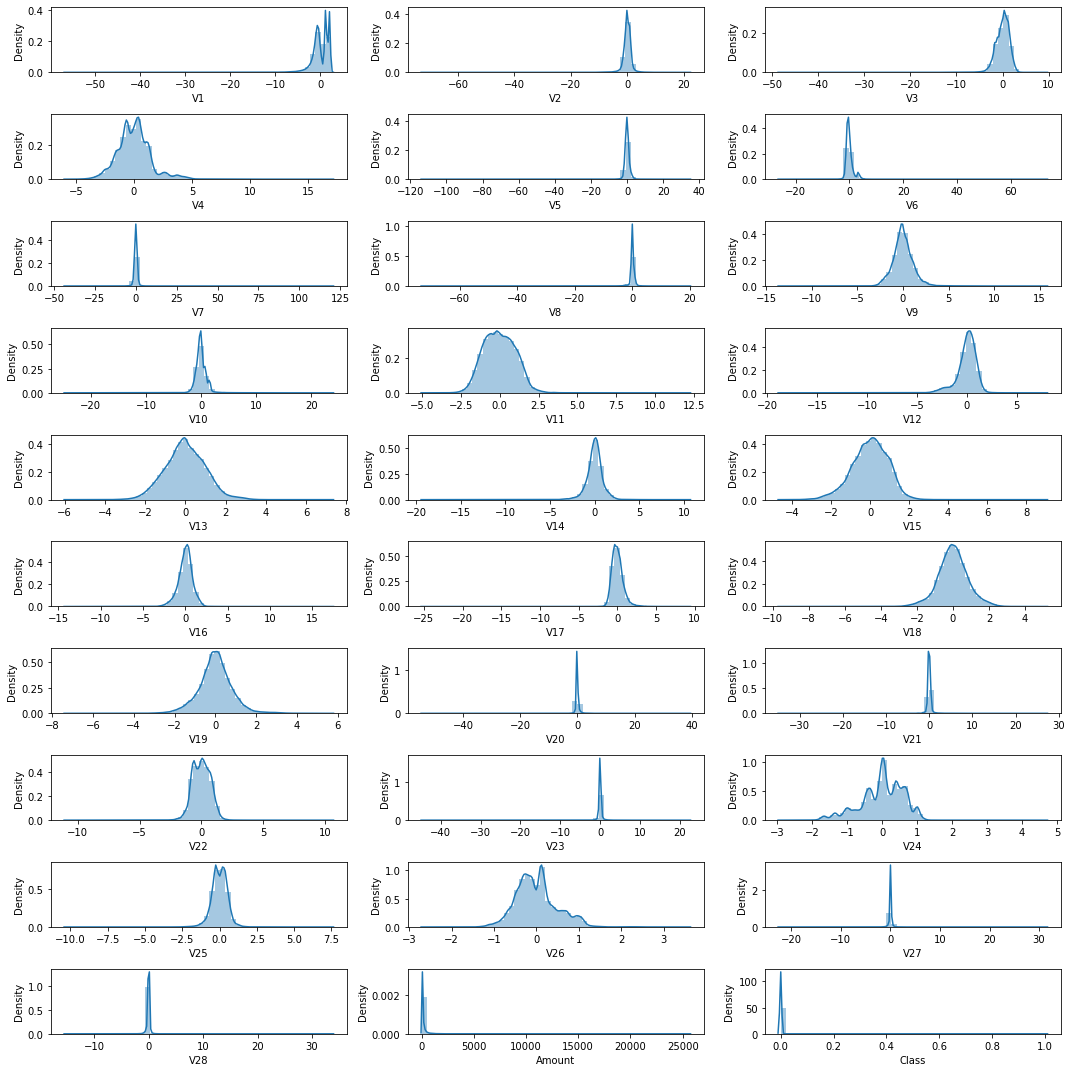

In [11]:
# Checking out on the distribution property of each variable i.e 'Skewness'


plt.figure(figsize = (15,15))
for i in enumerate(df.columns):
    plt.subplot(10,3,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xlabel(i[1])
plt.tight_layout()


As we can observe, the PCA transformed data is already following 'Guassian Distribution'. So, no skewness treatment required.

### Now we'll also look into the outliers

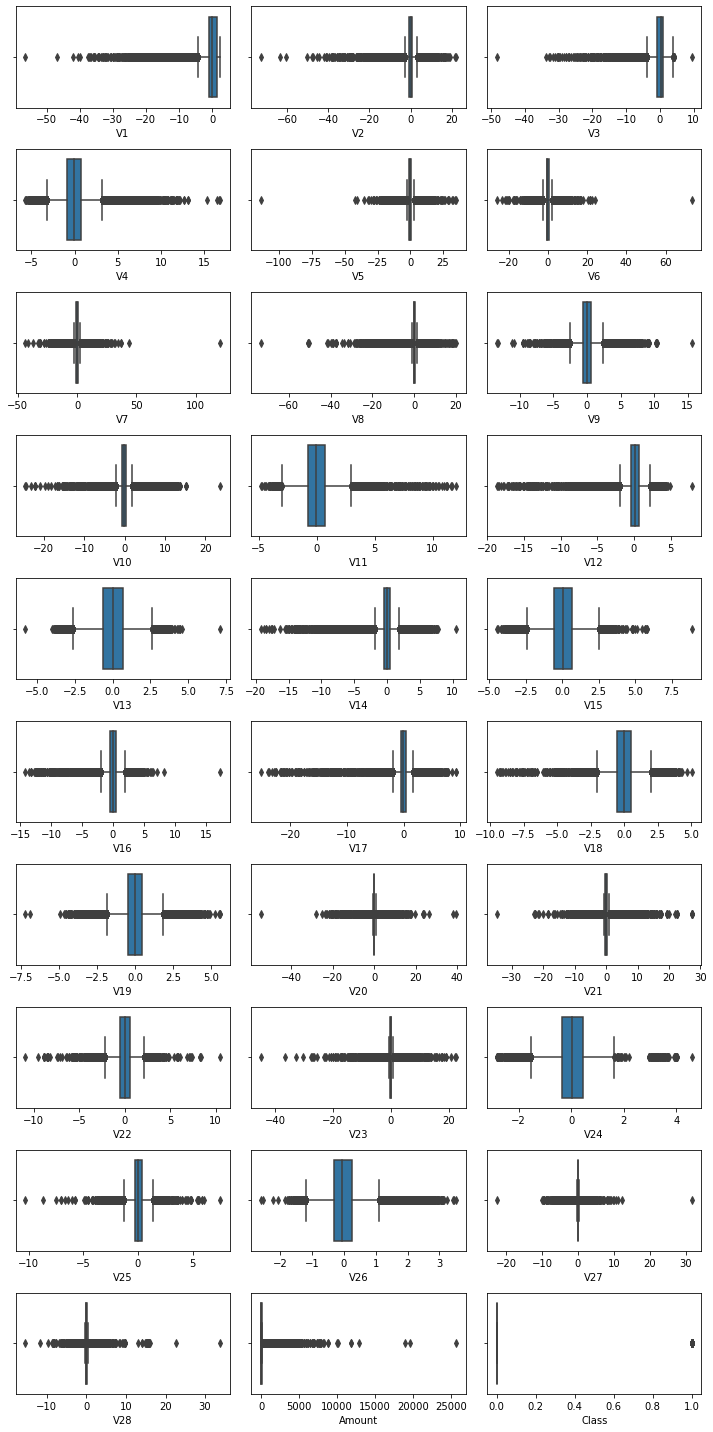

In [12]:
# Checking the outliers

plt.figure(figsize = (10,20))
for i in enumerate(df.columns):
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])
plt.tight_layout()

As 'Principle components' are the variables which are derived after combining each original varible from the dataset, we cannot afford to mask the data points of any variable as it may contain useful information.

So outliers treatment is not a good idea.

## Train--Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop('Class',axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
y=df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364,)
(85443,)


### Checking whether both the classes are equally balanced in train/test

In [18]:
y_train.value_counts(normalize=True)

0    0.998275
1    0.001725
Name: Class, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

0    0.998268
1    0.001732
Name: Class, dtype: float64

## Model Building (Without Class Imbalance)

In [20]:
# We'll start with basic decision tree algorithm as logistic Regression is irrelavant due to Class-Imbalance

from sklearn.tree import DecisionTreeClassifier

In [21]:
dt= DecisionTreeClassifier(random_state=100)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

Selecting the params from the available list

In [24]:
params={'max_depth':range(1,20,3),'min_samples_leaf':range(10,100,20),'criterion':['gini','entropy']}

In [25]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=2,n_jobs=-1,verbose=1,scoring='accuracy')


In [26]:
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 70 candidates, totalling 140 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 3),
                         'min_samples_leaf': range(10, 100, 20)},
             scoring='accuracy', verbose=1)

In [27]:
pd.DataFrame(grid_search.cv_results_).round(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.6777,0.0075,0.0269,0.0000,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.9992,0.9990,0.9991,0.0001,43
1,0.7560,0.0798,0.0269,0.0010,gini,1,30,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.9992,0.9990,0.9991,0.0001,43
2,0.8557,0.0140,0.0359,0.0000,gini,1,50,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.9992,0.9990,0.9991,0.0001,43
3,0.8417,0.0100,0.0379,0.0100,gini,1,70,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.9992,0.9990,0.9991,0.0001,43
4,0.7570,0.0888,0.0274,0.0015,gini,1,90,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.9992,0.9990,0.9991,0.0001,43
5,2.3796,0.0040,0.0264,0.0005,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.9994,0.9993,0.9993,0.0001,6
6,3.0454,0.0005,0.0344,0.0015,gini,4,30,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.9992,0.9991,0.9991,0.0000,31
7,3.0090,0.0369,0.0384,0.0045,gini,4,50,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.9992,0.9990,0.9991,0.0001,43
8,2.6873,0.3426,0.0279,0.0000,gini,4,70,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.9992,0.9990,0.9991,0.0001,43
9,2.3368,0.0160,0.0274,0.0005,gini,4,90,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.9992,0.9990,0.9991,0.0001,43


In [28]:
# Getting the best model out

dt_best=grid_search.best_estimator_

In [29]:
y_train_pred=pd.DataFrame(dt_best.predict_proba(X_train))[1]

In [30]:
y_train_pred_final= pd.DataFrame({'Converted': y_train.values,'Conversion_Prob':y_train_pred.values})
y_train_pred_final

,Converted,Conversion_Prob
0,0,0.000138
1,0,0.000138
2,0,0.000138
3,0,0.000138
4,0,0.000138
...,...,...
199359,0,0.000138
199360,0,0.000138
199361,0,0.000138
199362,0,0.000138


In [31]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [32]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

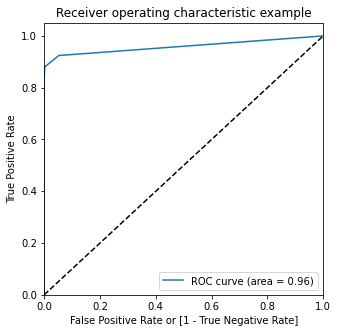

In [33]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [34]:
# Let' create a column with different probability cutt off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000138,1,0,0,0,0,0,0,0,0,0
1,0,0.000138,1,0,0,0,0,0,0,0,0,0
2,0,0.000138,1,0,0,0,0,0,0,0,0,0
3,0,0.000138,1,0,0,0,0,0,0,0,0,0
4,0,0.000138,1,0,0,0,0,0,0,0,0,0


In [35]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.002869   0.001727  1.000000
0.1   0.1  0.999468   0.847953  0.843023
0.2   0.2  0.999498   0.867470  0.837209
0.3   0.3  0.999574   0.938983  0.805233
0.4   0.4  0.999574   0.938983  0.805233
0.5   0.5  0.999574   0.938983  0.805233
0.6   0.6  0.999564   0.950877  0.787791
0.7   0.7  0.999523   0.969811  0.747093
0.8   0.8  0.999468   0.987705  0.700581
0.9   0.9  0.999388   1.000000  0.645349


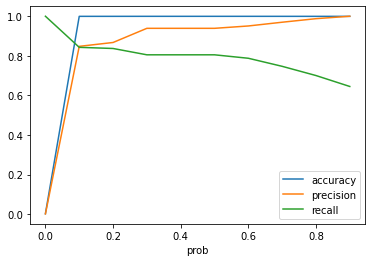

In [36]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])
plt.show()

Its too complicated to decide an optimum threshold point.We can fine tune it but we'll do that procedure on balanced data set.

So currently we are estimating optimum threshold to be 0.08

In [37]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.08 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000138,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000138,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000138,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000138,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000138,1,0,0,0,0,0,0,0,0,0,0


## Evaluating Model on test data

In [38]:
# Predicting y-test

y_test_pred=pd.DataFrame(dt_best.predict_proba(X_test))[1]
y_test_pred

0        0.001504
1        0.000138
2        0.000138
3        0.000138
4        0.000138
           ...   
85438    0.000138
85439    0.000138
85440    0.000138
85441    0.000138
85442    0.000138
Name: 1, Length: 85443, dtype: float64

In [39]:
y_test_pred_final= pd.DataFrame({'Converted': y_test.values,'Conversion_Prob':y_test_pred.values})
y_test_pred_final

,Converted,Conversion_Prob
0,0,0.001504
1,0,0.000138
2,0,0.000138
3,0,0.000138
4,0,0.000138
...,...,...
85438,0,0.000138
85439,0,0.000138
85440,0,0.000138
85441,0,0.000138


In [40]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.08 else 0)

y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.001504,0
1,0,0.000138,0
2,0,0.000138,0
3,0,0.000138,0
4,0,0.000138,0


In [41]:
# Evaluating the Model

def evaluate_model(dt_classifier,confusion_metric_train,confusion_metric_test):
    print("Train Accuracy :", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
    print("Recall :", confusion_metric_train[1,1]/(confusion_metric_train[1,0]+confusion_metric_train[1,1]))
    print("Precision :", confusion_metric_train[1,1]/(confusion_metric_train[0,1]+confusion_metric_train[1,1]))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted))
    print("Recall :", confusion_metric_test[1,1]/(confusion_metric_test[1,0]+confusion_metric_test[1,1]))
    print("Precision :", confusion_metric_test[1,1]/(confusion_metric_test[0,1]+confusion_metric_test[1,1]))

In [42]:
# Lets build confusion matrix on train=cm1 and test=cm2

confusion_train=confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion_test=confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

In [44]:
# Evaluating the model performance with respect to each relavant metrics on train and test

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

evaluate_model(dt_best,confusion_train,confusion_test)

Train Accuracy : 0.9993880540117573
Train Confusion Matrix:
[[198950     70]
 [    52    292]]
Recall : 0.8488372093023255
Precision : 0.8066298342541437
--------------------------------------------------
Test Accuracy : 0.9991807403766253
Test Confusion Matrix:
[[85253    42]
 [   28   120]]
Recall : 0.8108108108108109
Precision : 0.7407407407407407


In [ ]:
print(fbksw)

# Treating Class Imbalance

In [ ]:
# Here we'll do the treatment on existing X_train, y_train.

